# Hey guys I accidentally deleted the file lol

But I did get the MFSC preprocessing working, see below!

In [3]:
%reload_ext autoreload
%autoreload 2

from util.mfsc import *

digit_converter = TIDIGIT_Converter()

# First test with 5 samples
results_own = digit_converter.convert_tidigit_own('data/TIDIGIT_train.mat', 'train_samples', 20000, 41, 40)
results_own = np.array(results_own)

print(results_own.shape)

ModuleNotFoundError: No module named 'python_speech_features'

In [ ]:
# Now, converting the train and test sets:
results_lib_train_digit = digit_converter.convert_tidigit_lib('data/TIDIGIT_train.mat', 'train_samples', 20000, 41, 40)
results_lib_test_digit = digit_converter.convert_tidigit_lib('data/TIDIGIT_test.mat', 'test_samples', 20000, 41, 40)

results_lib_train_digit = np.array(results_lib_train_digit)
results_lib_test_digit = np.array(results_lib_test_digit)

2464it [00:00, 1573981.88it/s]
100%|██████████| 2464/2464 [00:38<00:00, 63.27it/s]
2486it [00:00, 1577941.85it/s]
100%|██████████| 2486/2486 [00:38<00:00, 64.43it/s]


In [ ]:
print(results_lib_train_digit.shape)
print(results_lib_test_digit.shape)

(2464, 41, 40)
(2486, 41, 40)


In [ ]:
# now the train and test digits are filtered using MFSC.
print(results_lib_train_digit[0])

[[-19.91056027 -20.21353767 -20.14275036 ... -16.99377998 -16.48396681
  -16.43285114]
 [-19.65693177 -20.55684295 -20.51409401 ... -16.8162379  -17.1259545
  -16.49300982]
 [-19.81013221 -21.12162325 -21.5245014  ... -17.00776243 -17.06658872
  -16.38663393]
 ...
 [-18.83454741 -17.64562034 -18.81732691 ... -16.61926791 -16.55868059
  -16.01111845]
 [-18.14693278 -18.75637508 -18.02294547 ... -17.09775792 -16.66261321
  -16.40505334]
 [-18.35539408 -18.14175202 -19.0744219  ... -17.00819403 -16.75948724
  -16.70922142]]


In [ ]:
# Saving files
handler = result_handler()
handler.save_file('data/results_lib_train_digit.npy', results_lib_train_digit)
print('saved train')
handler.save_file('data/results_lib_test_digit.npy', results_lib_test_digit)
print('saved test')

saved train
saved test


In [ ]:
# load files
train = handler.load_file('data/results_lib_train_digit.npy')
test = handler.load_file('data/results_lib_test_digit.npy')
print(train.shape)
print(test.shape)

(2464, 41, 40)
(2486, 41, 40)


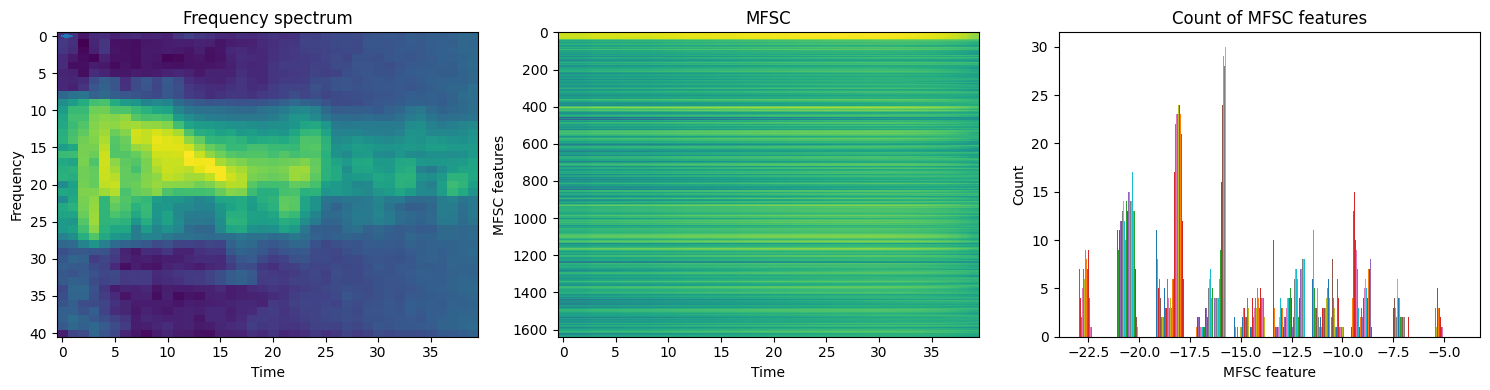

In [ ]:
mat = scipy.io.loadmat('data/TIDIGIT_train.mat')

interesting = mat['train_samples'][1,0]
audio = [item for sublist in interesting for item in sublist]

samplerate = 20000
duration = len(interesting)/samplerate
number_of_rows = 41
winstep = duration/number_of_rows
new_result = logfbank(interesting , samplerate = samplerate , winlen = 2 * winstep, winstep = winstep, nfilt=40, nfft=1024)

plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
plt.plot(np.linspace(0, len(interesting) / samplerate, num=len(interesting)), audio)
plt.imshow(new_result, aspect='auto', origin='lower');
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Frequency spectrum")

samplerate = 20000
duration = len(train[0])/samplerate
number_of_rows = 41
winstep = duration/number_of_rows
new_result = logfbank(train[0] , samplerate = samplerate , winlen = 2 * winstep, winstep = winstep, nfilt=40, nfft=1024)

plt.subplot(1, 3, 2)
plt.plot(np.linspace(0, len(train[0]) / samplerate, num=len(train[0])), train[0])
plt.imshow(new_result, aspect='auto', origin='lower');
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.xlabel("Time")
plt.ylabel("MFSC features")
plt.title("MFSC")

plt.subplot(1, 3, 3)
plt.hist(train[0])
plt.xlabel("MFSC feature")
plt.ylabel("Count")
plt.title("Count of MFSC features")
plt.tight_layout()
plt.show()




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c9b20c3d-7a79-41b8-80ff-4a7d3153c058' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>